In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import cv2    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

from IPython.core.display import display, HTML
from PIL import Image
from io import BytesIO
import base64
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.express as px

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


2024-08-10 21:53:36.099697: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/var/folders/4q/ld56_1kn62z9px05kfw3hnhw0000gn/T/ipykernel_77676/2857470661.py:18: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
picture = 'data/img_align_celeba/000007.jpg'


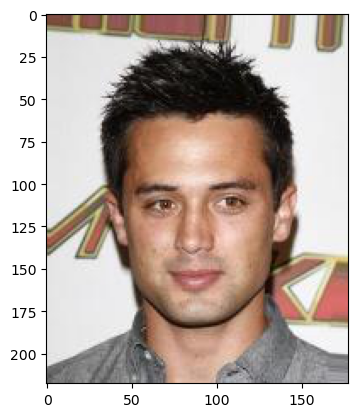

In [3]:
# Displaying one of the picture in the dataset
img = mpimg.imread( picture )
imgplot = plt.imshow( img )
plt.show()

In [4]:
# Loading dataset containing different attributes for each image 
df = pd.read_csv('data/list_attr_celeba.csv')
df


,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,...,-1,1,-1,1,1,-1,1,-1,-1,1


In [5]:
df.set_index('image_id', inplace = True) # Setting 'image_id' column as Index
df.replace(to_replace = -1, value = 0,inplace = True ) # Replacing '-1' values for '0', indicating the absence of attributes in the image
df.head(10) # Displaying dataframe after changes

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
image_id,,,,,,,,,,,,,,,,,,,,,
000001.jpg,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
000002.jpg,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
000003.jpg,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
000004.jpg,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
000005.jpg,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
000006.jpg,0,1,1,0,0,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,1
000007.jpg,1,0,1,1,0,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,1
000008.jpg,1,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
000009.jpg,0,1,1,0,0,1,1,0,0,0,...,0,1,0,0,1,0,1,0,0,1


In [6]:
df.columns


Index(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
       'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
       'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'],
      dtype='object')

In [7]:
# Creating 'gender' dataframe
gender = df[['Male']]
gender.head(10)

,Male
image_id,
000001.jpg,0
000002.jpg,0
000003.jpg,1
000004.jpg,0
000005.jpg,0
000006.jpg,0
000007.jpg,1
000008.jpg,1
000009.jpg,0


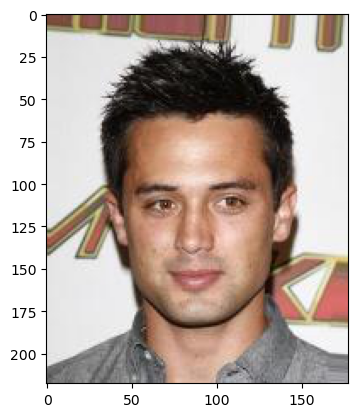

Male    1
Name: 000007.jpg, dtype: int64

In [8]:

# Displaying picture and 'Male' column label
img = mpimg.imread( picture )
imgplot = plt.imshow( img )
plt.show()
gender.loc[picture.split('/')[-1]][['Male']]

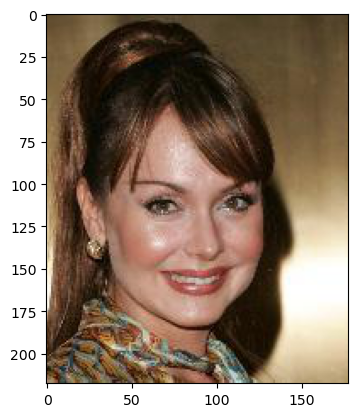

Male    0
Name: 000009.jpg, dtype: int64

In [9]:
# Plotting 000009.jpg image and label 
img = mpimg.imread('data/img_align_celeba/000009.jpg')
imgplot = plt.imshow(img)
plt.show()
gender.loc["data/img_align_celeba/000009.jpg".split('/')[-1]][['Male']]

In [10]:
# Plotting gender distribution pie plot
labels = {1:'Male', 0:'Female'} # Assigning 'Male' value for 1 and 'Female' value for 0
value_counts = gender['Male'].value_counts()
values = pd.DataFrame({'Male': value_counts.index, 'count': value_counts.values})
values['Male'] = values['Male'].map(labels)
fig = px.pie(values, values = 'count', names = 'Male', template = 'seaborn',
            title = 'Gender Distribution')
fig.update_traces(hole = .4)
fig.show()

In [11]:
# Loading and displayin partitions dataframe
partitions_df = pd.read_csv('data/list_eval_partition.csv')
partitions_df

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0
...,...,...
202594,202595.jpg,2
202595,202596.jpg,2
202596,202597.jpg,2
202597,202598.jpg,2


In [12]:
# Displaying partition distribution
# 0 ==> Training
# 1 ==> Validation
# 2 ==> Testing
partitions_counts = partitions_df['partition'].value_counts()
partitions_percentages = (partitions_df['partition'].value_counts(normalize=True) * 100).round(2)

partitions_values = pd.DataFrame({'count': partitions_counts, 'percentage':partitions_percentages})
partitions_values['percentage'] = partitions_values['percentage'].astype(str) + '%'

partitions_values.index = partitions_values.index.rename('partition')
partitions_values.index = partitions_values.index.map({0: 'Training',
                                                      1: 'Validation',
                                                      2: 'Testing'})
partitions_values

,count,percentage
partition,,
Training,162770,80.34%
Testing,19962,9.85%
Validation,19867,9.81%


In [13]:
# Setting index for 'partitions_df'
partitions_df.set_index('image_id', inplace = True)
partitions_df

,partition
image_id,
000001.jpg,0
000002.jpg,0
000003.jpg,0
000004.jpg,0
000005.jpg,0
...,...
202595.jpg,2
202596.jpg,2
202597.jpg,2


In [14]:
# Merging dataframes
data = gender.merge(partitions_df['partition'], left_index = True, right_index = True)
data

,Male,partition
image_id,,
000001.jpg,0,0
000002.jpg,0,0
000003.jpg,1,0
000004.jpg,0,0
000005.jpg,0,0
...,...,...
202595.jpg,0,2
202596.jpg,1,2
202597.jpg,1,2


In [15]:
main_folder = 'data/' # Defining variable for root folder
images_folder = main_folder + 'img_align_celeba/' # Defining variable for folder that contains images

TRAINING_SAMPLES = 10000 # Defining the amount of samples for the training set
VALIDATION_SAMPLES = 2000 # Defining the amount of samples for the validation set
TEST_SAMPLES = 2000 # Defining the amount of samples for the testing set
IMG_WIDTH = 178 # Setting image width
IMG_HEIGHT = 218 # Setting image height

In [16]:
# Loading Images
def load_reshape_img(fname):
    img = load_img(fname) # Loading image 
    x = img_to_array(img)/255. # Converting to array and normalizing
    x = x.reshape((1,) + x.shape) # Reshaping array to have an extra dimension of size 1

    return x


# Generating datasets
def sets_generator(partition, attribute, num_samples):
    
    # Creating 'df_' dataframe, consisting of an equal number of samples for male and female images
    # by selecting half of the samples with a value of 0 and half with a value of 1 from 'data' dataframe
    df_ = data[(data['partition'] == partition) 
                           & (data[attribute] == 0)].sample(int(num_samples/2))
    df_ = pd.concat([df_,
                      data[(data['partition'] == partition) 
                                  & (data[attribute] == 1)].sample(int(num_samples/2))])

    # For the training and validation sets
    if partition != 2:
        
        # Loading images and storing them in the 'x_' array
        x_ = np.array([load_reshape_img(images_folder + fname) for fname in df_.index])
        x_ = x_.reshape(x_.shape[0], 218, 178, 3)
        
        # Storing target variable in the 'y_' array
        y_ = to_categorical(df_[attribute],2) # Converting binary attributes to categorical variables
        
    # For the testing set
    else:
        x_ = []
        y_ = []

        for index, target in df_.iterrows():
            
            # Taking images as input and resizing
            im = cv2.imread(images_folder + index)
            im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), (IMG_WIDTH, IMG_HEIGHT)).astype(np.float32) / 255.0
            im = np.expand_dims(im, axis =0)
            x_.append(im) # Storing in normalized images
            y_.append(target[attribute]) # Storing in the target variable

    return x_, y_


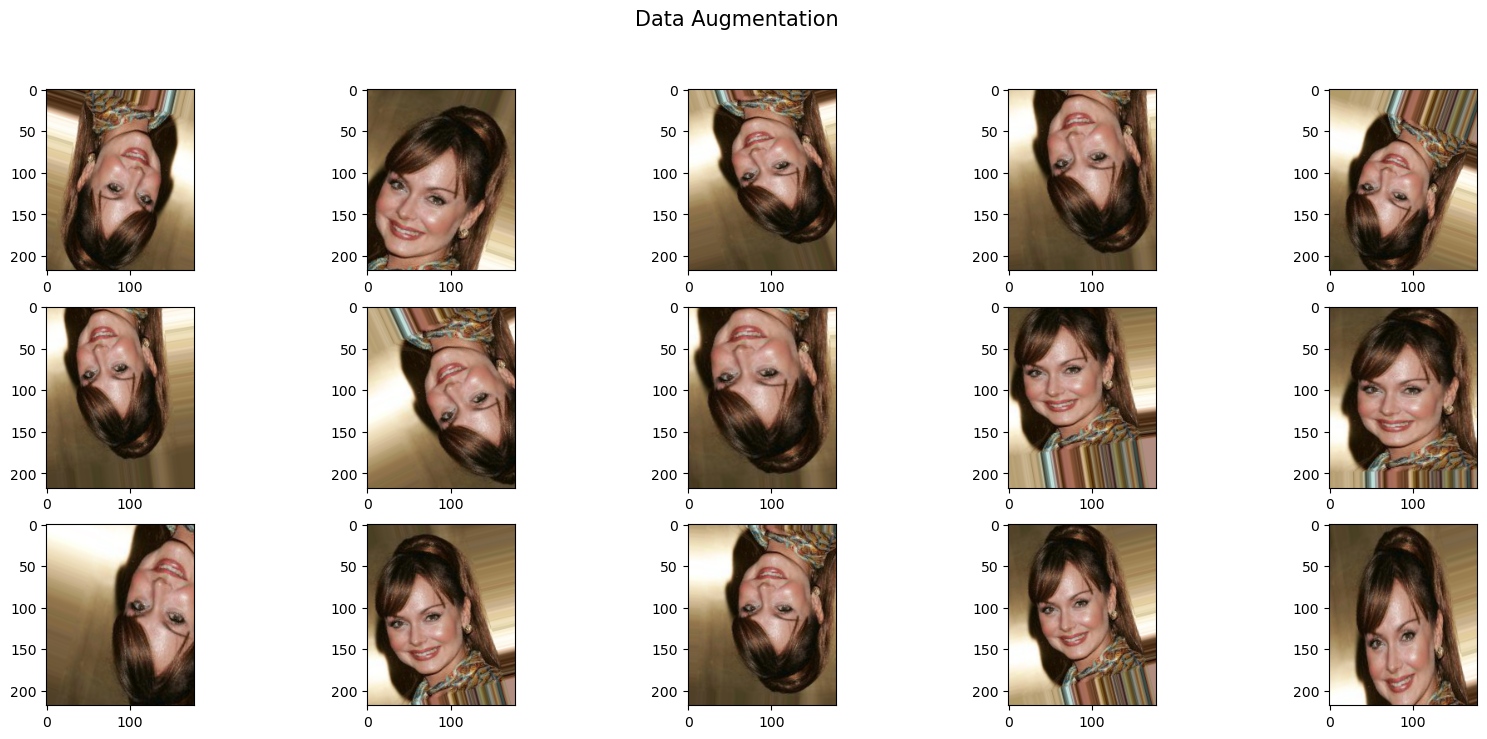

In [17]:
# Demonstrating Data Augmentation
datagen = ImageDataGenerator(
rotation_range = 30,  # Rotating image within an angle between 0 & 30 degrees
width_shift_range = 0.2, # Random horizontal shift
height_shift_range = 0.2, # Random vertical shift
shear_range = 0.2, # Random application of shearing transformations
zoom_range = 0.2, # Random zoom within range
horizontal_flip = True, # Horizontal flip
vertical_flip = True) # Vertical flip

# Loading example image 
img = load_img('data/img_align_celeba/000009.jpg')
x = img_to_array(img)/255.
x = x.reshape((1, ) + x.shape)

# Plotting Data Augmentation based on example image
plt.figure(figsize = (20, 8))
plt.suptitle('Data Augmentation', fontsize = 15)

i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.subplot(3, 5, i + 1)
    plt.grid = (False)
    plt.imshow(batch.reshape(218, 178, 3))
    
    if i == 14:
        break
    i += 1
    
plt.show()

In [18]:
# Splitting data
X_train, y_train = sets_generator(0, 'Male', TRAINING_SAMPLES)

In [19]:
# Applying Data Augmentation on training data
train_datagen = ImageDataGenerator(rotation_range = 30,
width_shift_range = 0.2,
height_shift_range = 0.2,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True,
vertical_flip = True)

train_datagen.fit(X_train)
train_generator = train_datagen.flow(X_train, y_train, batch_size = 16)

In [20]:
X_val, y_val = sets_generator(1, 'Male', VALIDATION_SAMPLES)


In [21]:
# Applying Data Augmentation on validation data
val_datagen = ImageDataGenerator(rotation_range = 30,
width_shift_range = 0.2,
height_shift_range = 0.2,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True,
vertical_flip = True)

val_datagen.fit(X_val)
val_generator = val_datagen.flow(X_train, y_train, batch_size = 16)

In [22]:
# Loading InceptionV3
base_model = InceptionV3(weights = 'imagenet', include_top = False)

# Freezing layers in the base model to prevent overfitting
for layer in base_model.layers:
    layer.trainable = False
    
# Adding new layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation = 'relu')(x)
predictions = Dense(2, activation = 'softmax')(x)
# Defining final model
model = Model(inputs = base_model.input, outputs = predictions)

In [23]:
tf.keras.utils.plot_model(model)


In [24]:
# Compiling model created above
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [25]:
checkpointer = ModelCheckpoint(filepath='weights.best.inc.male.keras', 
                               verbose=1, save_best_only=True)

In [26]:
# Training model
history = model.fit(X_train, y_train,
         validation_data = (X_val, y_val), epochs = 1, batch_size = 32, callbacks=[checkpointer])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8660 - loss: 0.6481
Epoch 1: val_loss improved from inf to 0.21048, saving model to weights.best.inc.male.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 1343s 4s/step - accuracy: 0.8661 - loss: 0.6472 - val_accuracy: 0.9235 - val_loss: 0.2105


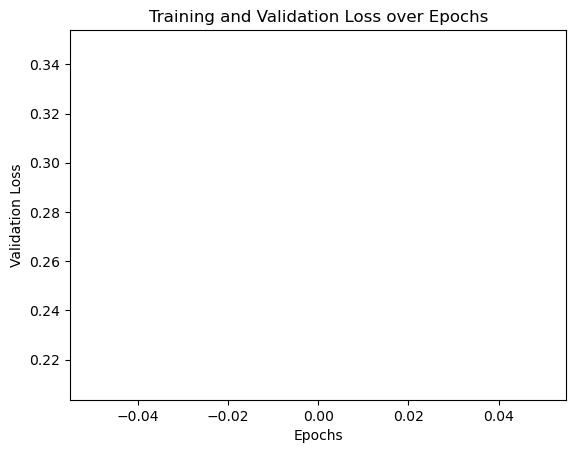

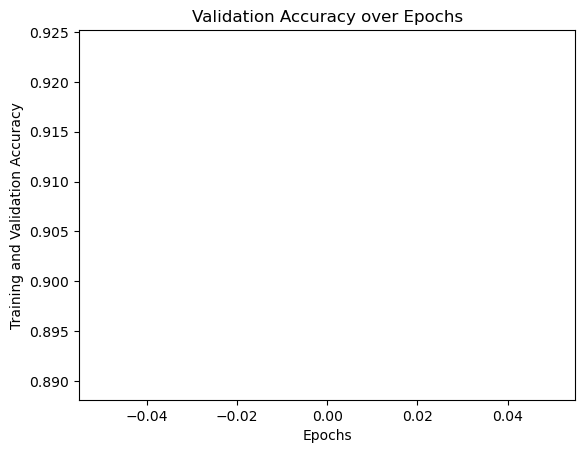

In [28]:
# Plotting loss function and accuracy over epochs
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

plt.plot(range(len(train_loss)), train_loss, label = 'Training Loss')
plt.plot(range(len(val_loss)), val_loss, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.show()

plt.plot(range(len(train_acc)), train_acc, label = 'Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.show()

In [39]:
# Loading best model
model.load_weights('weights.best.inc.male.keras')


In [40]:
model.save('gender_recognition.h5')


In [ ]:
# Splitting testing data
X_test, y_test = sets_generator(2, 'Male', TEST_SAMPLES)

In [ ]:
# Running predictions on testing data
from sklearn.metrics import accuracy_score
y_pred = [np.argmax(model.predict(feature)) for feature in X_test ]
acc = (accuracy_score(y_test, y_pred)) * 50

In [ ]:
# Printing accuracy on testing data
print(f"Accuracy: %.2f%%" % acc)